# Bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#Feature Engineer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algoritmo de Agrupamento
from sklearn.cluster import KMeans

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Para processar arquivos e imagens
#from PIL import Image
#import glob

# Para plotar imagens
#import matplotlib.image as mpimg

In [2]:
dados_pede = pd.read_excel('tb_pesquisa_desenvolvimento_educacional_passos.xlsx')
dados_pede.head()

,ANO,ANOS_PM,ANO_INGRESSO,BOLSISTA,CF,CG,CT,DEFASAGEM,DESTAQUE_IDA,DESTAQUE_IEG,...,NOTA_PORT,PEDRA,PONTO_VIRADA,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,SINALIZADOR_INGRESSANTE,TURMA
0,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,Ametista,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,Ametista,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,Quartzo,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,Ametista,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dados_externos = pd.read_excel('tb_populacao_economia_idade_distancia.xlsx')
dados_externos.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,Pessoas de 6 a 19 anos,Distância,Matriculados 6 a 19,Elegíveis/População,Matriculados/População 6 a 19
0,Adamantina,2.2,0.790,38997.12,411.987,34687,84.19,7609,5103,499.141743,130,0.219362,0.025475
1,Adolfo,1.8,0.730,32578.28,211.055,4351,20.62,1064,763,369.221881,745,0.244541,0.976409
2,Aguaí,2.3,0.715,35551.70,474.554,32072,67.58,8725,5925,136.239243,198,0.272044,0.033418
3,Águas da Prata,2.2,0.781,25297.02,142.673,7369,51.65,1580,1095,145.356177,832,0.214412,0.759817
4,Águas de Lindóia,1.9,0.745,30971.23,60.126,17930,298.21,4089,2817,105.653242,2630,0.228054,0.933617


In [4]:
dados_externos['percent_elegiveis_6a19a'] = dados_externos['Pessoas de 6 a 19 anos'] / dados_externos['População no último censo'] * 100
dados_externos['Matriculados/População 6 a 19'] = dados_externos['Matriculados/População 6 a 19'] * 100
dados_externos.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,Pessoas de 6 a 19 anos,Distância,Matriculados 6 a 19,Elegíveis/População,Matriculados/População 6 a 19,percent_elegiveis_6a19a
0,Adamantina,2.2,0.790,38997.12,411.987,34687,84.19,7609,5103,499.141743,130,0.219362,2.547521,14.711563
1,Adolfo,1.8,0.730,32578.28,211.055,4351,20.62,1064,763,369.221881,745,0.244541,97.640891,17.536199
2,Aguaí,2.3,0.715,35551.70,474.554,32072,67.58,8725,5925,136.239243,198,0.272044,3.341772,18.474058
3,Águas da Prata,2.2,0.781,25297.02,142.673,7369,51.65,1580,1095,145.356177,832,0.214412,75.981735,14.859547
4,Águas de Lindóia,1.9,0.745,30971.23,60.126,17930,298.21,4089,2817,105.653242,2630,0.228054,93.361732,15.711099


In [5]:

dados_externos = dados_externos[['Município', 'Salário médio mensal dos trabalhadores formais', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Distância', 'Matriculados/População 6 a 19', 'percent_elegiveis_6a19a']]
dados_externos = dados_externos.rename(columns= {'Município': 'municipio', 'Salário médio mensal dos trabalhadores formais': 'salario_medio_trabalhadores', 'PIB per capita': 'pib_per_capita', 'Área da unidade territorial': 'area_territorial', 'População no último censo': 'populacao', 'Densidade demográfica habitante/km²': 'densidade_demografica_km2', 'Distância': 'distancia_de_embu_guacu', 'Matriculados/População 6 a 19': 'percent_matriculados_6a19a'})
dados_externos.head()

,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
0,Adamantina,2.2,38997.12,34687,84.19,499.141743,2.547521,14.711563
1,Adolfo,1.8,32578.28,4351,20.62,369.221881,97.640891,17.536199
2,Aguaí,2.3,35551.70,32072,67.58,136.239243,3.341772,18.474058
3,Águas da Prata,2.2,25297.02,7369,51.65,145.356177,75.981735,14.859547
4,Águas de Lindóia,1.9,30971.23,17930,298.21,105.653242,93.361732,15.711099


In [6]:
dados_externos.shape

(645, 8)

In [7]:
dados_externos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   municipio                    645 non-null    object 
 1   salario_medio_trabalhadores  645 non-null    float64
 2   pib_per_capita               645 non-null    float64
 3   populacao                    645 non-null    int64  
 4   densidade_demografica_km2    645 non-null    float64
 5   distancia_de_embu_guacu      645 non-null    float64
 6   percent_matriculados_6a19a   645 non-null    float64
 7   percent_elegiveis_6a19a      645 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 40.4+ KB


In [8]:
dados_externos.describe()

,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
count,645.000000,645.000000,6.450000e+02,645.000000,645.000000,645.000000,645.000000
mean,2.314419,42570.214109,6.885463e+04,329.735287,277.389401,51.110671,17.707461
std,0.478572,39799.761795,4.644210e+05,1284.631338,158.321212,39.799544,1.841663
min,1.300000,9468.330000,9.070000e+02,3.510000,0.000000,0.083549,6.277335
25%,2.000000,23966.140000,5.466000e+03,20.210000,145.356177,2.732478,16.590538
50%,2.200000,32233.410000,1.316300e+04,40.070000,268.556071,74.621849,17.713976
75%,2.500000,46763.190000,3.832400e+04,117.500000,409.601689,85.156848,18.942731
max,5.500000,457517.700000,1.145200e+07,13416.810000,700.561245,157.662338,22.261728


In [9]:
dados_externos.sort_values(by='pib_per_capita', ascending=False).head()


,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
412,Paulínia,4.5,457517.70,110537,796.51,89.913478,2.724938,19.023494
310,Louveira,3.6,385773.53,51847,930.19,58.667441,1.924635,19.040639
236,Ilhabela,2.8,385605.85,34934,100.85,162.150140,1.831720,19.221961
103,Cajamar,3.0,287384.67,92689,705.47,36.911941,1.551928,20.090841
194,Gavião Peixoto,5.5,244615.79,4702,19.29,239.549678,87.527352,19.438537


## Backup DataFrame

In [10]:
dados_externos_bkp = dados_externos

In [49]:
dados_externos_bkp.head()

,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
0,Adamantina,2.2,38997.12,34687,84.19,499.141743,2.547521,14.711563
1,Adolfo,1.8,32578.28,4351,20.62,369.221881,97.640891,17.536199
2,Aguaí,2.3,35551.70,32072,67.58,136.239243,3.341772,18.474058
3,Águas da Prata,2.2,25297.02,7369,51.65,145.356177,75.981735,14.859547
4,Águas de Lindóia,1.9,30971.23,17930,298.21,105.653242,93.361732,15.711099


# Modelo matemático

In [11]:
dados_model_math = dados_externos[['municipio', 'salario_medio_trabalhadores', 'pib_per_capita', 'densidade_demografica_km2', 'distancia_de_embu_guacu', 'percent_matriculados_6a19a', 'percent_elegiveis_6a19a']]
dados_model_math.head()

,municipio,salario_medio_trabalhadores,pib_per_capita,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
0,Adamantina,2.2,38997.12,84.19,499.141743,2.547521,14.711563
1,Adolfo,1.8,32578.28,20.62,369.221881,97.640891,17.536199
2,Aguaí,2.3,35551.70,67.58,136.239243,3.341772,18.474058
3,Águas da Prata,2.2,25297.02,51.65,145.356177,75.981735,14.859547
4,Águas de Lindóia,1.9,30971.23,298.21,105.653242,93.361732,15.711099


In [12]:
# Normalizandos os dados
variaveis_normalizar = ['densidade_demografica_km2', 'percent_elegiveis_6a19a']

variaveis_normalizar_inversamente = ['salario_medio_trabalhadores','pib_per_capita', 'distancia_de_embu_guacu', 'percent_matriculados_6a19a']

# Normalização
scaler = MinMaxScaler()
dados_model_math[variaveis_normalizar] = scaler.fit_transform(dados_model_math[variaveis_normalizar])

# Normalização inversa
scaler = MinMaxScaler()
dados_model_math[variaveis_normalizar_inversamente] = 1 - scaler.fit_transform(dados_model_math[variaveis_normalizar_inversamente])

dados_model_math.head()



<ipython-input-12-792ae29e044f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_model_math[variaveis_normalizar] = scaler.fit_transform(dados_model_math[variaveis_normalizar])
<ipython-input-12-792ae29e044f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_model_math[variaveis_normalizar_inversamente] = 1 - scaler.fit_transform(dados_model_math[variaveis_normalizar_inversamente])


,municipio,salario_medio_trabalhadores,pib_per_capita,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
0,Adamantina,0.785714,0.934095,0.006015,0.287512,0.984364,0.527654
1,Adolfo,0.880952,0.948421,0.001276,0.472963,0.380898,0.704366
2,Aguaí,0.761905,0.941785,0.004777,0.805528,0.979323,0.763039
3,Águas da Prata,0.785714,0.964672,0.003589,0.792515,0.518348,0.536912
4,Águas de Lindóia,0.857143,0.952008,0.021971,0.849188,0.408054,0.590186


In [13]:
#DEIXAR VARIÁVEIS DINAMICAS NO STREAMLIT
# Pesos
prioridade_distancia_embu = 6
prioridade_salario_medio = 5
prioridade_pib_per_capita = 4
prioridade_percent_idade_elegivel = 3
prioridade_percent_matriculados = 2
prioridade_densidade_demografica = 1

# Atribuição de pesos
dados_model_math['distancia_de_embu_guacu'] = prioridade_distancia_embu * dados_model_math['distancia_de_embu_guacu']
dados_model_math['salario_medio_trabalhadores'] = prioridade_salario_medio * dados_model_math['salario_medio_trabalhadores']
dados_model_math['pib_per_capita'] = prioridade_pib_per_capita * dados_model_math['pib_per_capita']
dados_model_math['percent_elegiveis_6a19a'] = prioridade_percent_idade_elegivel * dados_model_math['percent_elegiveis_6a19a']
dados_model_math['percent_matriculados_6a19a'] = prioridade_percent_matriculados * dados_model_math['percent_matriculados_6a19a']
dados_model_math['densidade_demografica_km2'] = prioridade_densidade_demografica * dados_model_math['densidade_demografica_km2']


# Soma ponderada
dados_model_math['soma_ponderada'] = dados_model_math[['distancia_de_embu_guacu', 'salario_medio_trabalhadores', 'pib_per_capita', 'percent_elegiveis_6a19a', 'percent_matriculados_6a19a', 'densidade_demografica_km2']].sum(axis=1)

# Classificar o DataFrame com base na soma ponderada
dados_model_math = dados_model_math.sort_values(by='soma_ponderada', ascending=False)


<ipython-input-13-05204e79d724>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_model_math['distancia_de_embu_guacu'] = prioridade_distancia_embu * dados_model_math['distancia_de_embu_guacu']
<ipython-input-13-05204e79d724>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_model_math['salario_medio_trabalhadores'] = prioridade_salario_medio * dados_model_math['salario_medio_trabalhadores']
<ipython-input-13-05204e79d724>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [14]:
# Visualizando o DataFrame classificado
dados_model_math.head(10)

,municipio,salario_medio_trabalhadores,pib_per_capita,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a,soma_ponderada
121,Carapicuíba,3.928571,3.933568,0.834879,5.798219,2.000000,2.536965,19.032202
298,Juquitiba,4.642857,3.923607,0.003651,5.752492,1.984541,2.557842,18.864990
188,Francisco Morato,3.928571,3.991334,0.250990,5.634046,1.971459,2.793291,18.569691
560,São Lourenço da Serra,5.000000,3.926531,0.006163,5.875988,1.409045,2.337915,18.555642
590,Taboão da Serra,3.452381,3.775737,1.000000,5.840080,1.999863,2.384057,18.452117
266,Itaquaquecetuba,3.690476,3.860337,0.332949,5.499922,1.999977,2.869533,18.253194
446,Poá,4.047619,3.802271,0.447837,5.515278,1.968161,2.450348,18.231513
256,Itapecerica da Serra,3.690476,3.840462,0.078139,5.914966,1.978017,2.728076,18.230137
182,Ferraz de Vasconcelos,3.690476,3.871489,0.451890,5.537967,1.969172,2.623627,18.144622
169,Embu-Guaçu,3.571429,3.899880,0.031818,6.000000,1.984722,2.609983,18.097831


In [15]:
dados_model_math.describe()

,salario_medio_trabalhadores,pib_per_capita,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a,soma_ponderada
count,645.000000,6.450000e+02,645.000000,6.450000e+02,645.000000,645.000000,645.000000
mean,3.792359,3.704480e+00,0.024321,3.624281e+00,1.352361,2.145241,14.643043
std,0.569728,3.553159e-01,0.095773,1.355952e+00,0.505138,0.345649,1.712510
min,0.000000,-8.881784e-16,0.000000,6.661338e-16,0.000000,0.000000,9.210531
25%,3.571429,3.667047e+00,0.001245,2.491941e+00,0.920244,1.935614,13.333668
50%,3.928571,3.796763e+00,0.002726,3.699935e+00,1.053955,2.146464,14.746503
75%,4.166667,3.870570e+00,0.008498,4.755088e+00,1.966380,2.377080,15.882691
max,5.000000,4.000000e+00,1.000000,6.000000e+00,2.000000,3.000000,19.032202


In [16]:
dados_externos.iloc[121]

municipio                      Carapicuíba
salario_medio_trabalhadores            2.2
pib_per_capita                    16909.54
populacao                           386984
densidade_demografica_km2         11201.99
distancia_de_embu_guacu           23.56001
percent_matriculados_6a19a        0.083549
percent_elegiveis_6a19a          19.794617
Name: 121, dtype: object

In [17]:
dados_externos.iloc[412]

municipio                       Paulínia
salario_medio_trabalhadores          4.5
pib_per_capita                  457517.7
populacao                         110537
densidade_demografica_km2         796.51
distancia_de_embu_guacu        89.913478
percent_matriculados_6a19a      2.724938
percent_elegiveis_6a19a        19.023494
Name: 412, dtype: object

In [52]:
dados_externos_model_math = pd.merge(dados_externos, dados_model_math[['municipio', 'soma_ponderada']], on='municipio', how='left')
dados_externos_model_math.head()

,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a,soma_ponderada
0,Adamantina,2.2,38997.12,34687,84.19,499.141743,2.547521,14.711563,12.947724
1,Adolfo,1.8,32578.28,4351,20.62,369.221881,97.640891,17.536199,13.912392
2,Aguaí,2.3,35551.70,32072,67.58,136.239243,3.341772,18.474058,16.662374
3,Águas da Prata,2.2,25297.02,7369,51.65,145.356177,75.981735,14.859547,15.193368
4,Águas de Lindóia,1.9,30971.23,17930,298.21,105.653242,93.361732,15.711099,15.797507


In [63]:
dados_externos_model_math = dados_externos_model_math.sort_values('soma_ponderada', ascending = False)
dados_externos_model_math.head(10)

,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a,soma_ponderada
121,Carapicuíba,2.2,16909.54,386984,11201.99,23.560010,0.083549,19.794617,19.032202
298,Juquitiba,1.6,18025.29,27404,52.48,28.899047,1.301558,19.905853,18.864990
188,Francisco Morato,2.2,10439.01,165139,3370.11,42.728860,2.332303,21.160356,18.569691
560,São Lourenço da Serra,1.3,17697.76,16067,86.17,14.479614,46.644518,18.734051,18.555642
590,Taboão da Serra,2.6,34588.58,273542,13416.81,18.672312,0.094380,18.979901,18.452117
266,Itaquaquecetuba,2.4,25112.29,369275,4469.45,58.389219,0.085384,21.566583,18.253194
446,Poá,2.1,31616.47,103765,6010.48,56.596278,2.592094,19.333108,18.231513
256,Itapecerica da Serra,2.4,27338.58,158522,1051.61,9.928557,1.815537,20.812884,18.230137
182,Ferraz de Vasconcelos,2.4,23863.13,179198,6064.85,53.947017,2.512466,20.256364,18.144622
169,Embu-Guaçu,2.5,20683.01,66970,430.29,0.000000,1.287268,20.183664,18.097831


# K-Means

In [18]:
dados_model_kmeans = dados_model_math.drop('soma_ponderada', axis = 1)
dados_model_kmeans.head()

,municipio,salario_medio_trabalhadores,pib_per_capita,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
121,Carapicuíba,3.928571,3.933568,0.834879,5.798219,2.000000,2.536965
298,Juquitiba,4.642857,3.923607,0.003651,5.752492,1.984541,2.557842
188,Francisco Morato,3.928571,3.991334,0.250990,5.634046,1.971459,2.793291
560,São Lourenço da Serra,5.000000,3.926531,0.006163,5.875988,1.409045,2.337915
590,Taboão da Serra,3.452381,3.775737,1.000000,5.840080,1.999863,2.384057


In [19]:
dados_model_kmeans.shape

(645, 7)

In [39]:
dados_model_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 121 to 194
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   municipio                    645 non-null    object 
 1   salario_medio_trabalhadores  645 non-null    float64
 2   pib_per_capita               645 non-null    float64
 3   densidade_demografica_km2    645 non-null    float64
 4   distancia_de_embu_guacu      645 non-null    float64
 5   percent_matriculados_6a19a   645 non-null    float64
 6   percent_elegiveis_6a19a      645 non-null    float64
 7   Grupos                       645 non-null    int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 42.8+ KB


In [ ]:
#variaveis_preditoras = ['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']
# variaveis_preditoras = ['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)']
# num_clusters = 8
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# dados_classificados_kmeans['cluster'] = kmeans.fit_predict(dados_classificados_kmeans[variaveis_preditoras])

In [35]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=8,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(dados_model_kmeans[['distancia_de_embu_guacu', 'salario_medio_trabalhadores', 'pib_per_capita', 'percent_elegiveis_6a19a', 'percent_matriculados_6a19a', 'densidade_demografica_km2']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados_model_kmeans[['distancia_de_embu_guacu', 'salario_medio_trabalhadores', 'pib_per_capita', 'percent_elegiveis_6a19a', 'percent_matriculados_6a19a', 'densidade_demografica_km2']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
dados_model_kmeans['grupos'] = kmeans_labels
dados_model_kmeans.head()


,municipio,salario_medio_trabalhadores,pib_per_capita,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a,grupos
121,Carapicuíba,3.928571,3.933568,0.834879,5.798219,2.000000,2.536965,4
298,Juquitiba,4.642857,3.923607,0.003651,5.752492,1.984541,2.557842,4
188,Francisco Morato,3.928571,3.991334,0.250990,5.634046,1.971459,2.793291,4
560,São Lourenço da Serra,5.000000,3.926531,0.006163,5.875988,1.409045,2.337915,4
590,Taboão da Serra,3.452381,3.775737,1.000000,5.840080,1.999863,2.384057,6


In [38]:
pd.Series(kmeans_labels).value_counts()

2    119
1    111
5    102
0     85
3     79
4     77
6     63
7      9
dtype: int64

In [64]:
dados_externos_order_math = dados_externos_model_math.drop('soma_ponderada', axis = 1)
dados_externos_order_math.head()

,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a
121,Carapicuíba,2.2,16909.54,386984,11201.99,23.560010,0.083549,19.794617
298,Juquitiba,1.6,18025.29,27404,52.48,28.899047,1.301558,19.905853
188,Francisco Morato,2.2,10439.01,165139,3370.11,42.728860,2.332303,21.160356
560,São Lourenço da Serra,1.3,17697.76,16067,86.17,14.479614,46.644518,18.734051
590,Taboão da Serra,2.6,34588.58,273542,13416.81,18.672312,0.094380,18.979901


In [65]:
dados_externos_model_kmeans = pd.merge(dados_externos_order_math, dados_model_kmeans[['municipio', 'grupos']], on='municipio', how='left')
dados_externos_model_kmeans.head(10)

,municipio,salario_medio_trabalhadores,pib_per_capita,populacao,densidade_demografica_km2,distancia_de_embu_guacu,percent_matriculados_6a19a,percent_elegiveis_6a19a,grupos
0,Carapicuíba,2.2,16909.54,386984,11201.99,23.560010,0.083549,19.794617,4
1,Juquitiba,1.6,18025.29,27404,52.48,28.899047,1.301558,19.905853,4
2,Francisco Morato,2.2,10439.01,165139,3370.11,42.728860,2.332303,21.160356,4
3,São Lourenço da Serra,1.3,17697.76,16067,86.17,14.479614,46.644518,18.734051,4
4,Taboão da Serra,2.6,34588.58,273542,13416.81,18.672312,0.094380,18.979901,6
5,Itaquaquecetuba,2.4,25112.29,369275,4469.45,58.389219,0.085384,21.566583,4
6,Poá,2.1,31616.47,103765,6010.48,56.596278,2.592094,19.333108,4
7,Itapecerica da Serra,2.4,27338.58,158522,1051.61,9.928557,1.815537,20.812884,4
8,Ferraz de Vasconcelos,2.4,23863.13,179198,6064.85,53.947017,2.512466,20.256364,4
9,Embu-Guaçu,2.5,20683.01,66970,430.29,0.000000,1.287268,20.183664,4


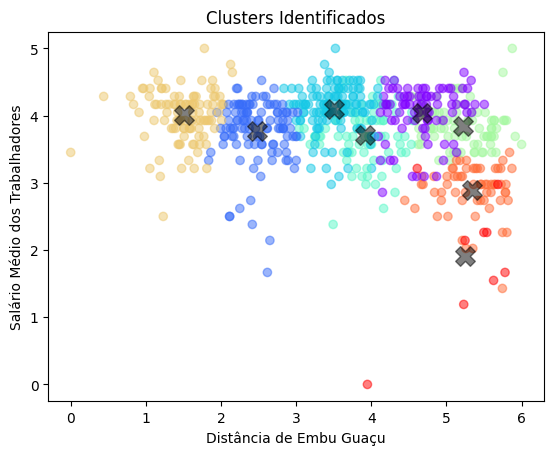

In [67]:
import matplotlib.pyplot as plt

# Plotando os dados identificando com os seus clusters
plt.scatter(dados_model_kmeans['distancia_de_embu_guacu'],
            dados_model_kmeans['salario_medio_trabalhadores'],
            c=kmeans_labels,
            alpha=0.5,
            cmap='rainbow')

# Plotando os centroides
plt.scatter(centroides[:, 0],
            centroides[:, 1],
            c='black',
            marker='X',
            s=200,
            alpha=0.5)

plt.xlabel('Distância de Embu Guaçu')
plt.ylabel('Salário Médio dos Trabalhadores')
plt.title('Clusters Identificados')
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()


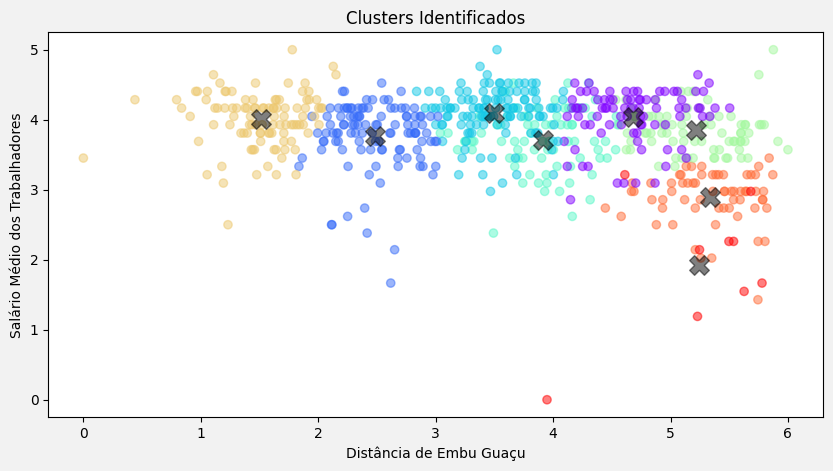

In [68]:
import matplotlib.pyplot as plt

# Criando a figura
fig = plt.figure()

# Plotando os dados identificando com os seus clusters
plt.scatter(dados_model_kmeans['distancia_de_embu_guacu'],
            dados_model_kmeans['salario_medio_trabalhadores'],
            c=kmeans_labels,
            alpha=0.5,
            cmap='rainbow')

# Plotando os centroides
plt.scatter(centroides[:, 0],
            centroides[:, 1],
            c='black',
            marker='X',
            s=200,
            alpha=0.5)

plt.xlabel('Distância de Embu Guaçu')
plt.ylabel('Salário Médio dos Trabalhadores')
plt.title('Clusters Identificados')
plt.rcParams['figure.figsize'] = (10, 5)

# Definindo a cor de fundo
fig.patch.set_facecolor('#F2F2F2')

plt.show()
